Building ANNs comes with practice. In this lecture we apply ANN to some real data. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

%matplotlib inline

In [2]:
path='C:\\Users\\pgao\\Documents\\PGZ Documents\\Programming Workshop\\PYTHON\\Open Courses on Python\\Udemy Course on Python\\Introduction to Data Science Using Python\\datasets'
#path='C:\\Users\\GAO\\GAO_Jupyter_Notebook\\Datasets'
os.chdir(path)# prepare train and test dataset

### I. Predicting Credit Defaults

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

Given historical loans data with information on whether or not the borrower defaulted (charge-off), the question is whether we can build a model predicting whether or nor a borrower will pay back their loan. This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. This is a classification problem.  

There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

There are two datasets we need to read in. One is the actual dataset and the other contains the specs, or information related to the main dataset:

In [3]:
data_info = pd.read_csv("lending_club_info.csv",index_col="LoanStatNew")
data_info.head()

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade


In [4]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])
    print('--------')
    
feat_info('loan_amnt')
feat_info('revol_util')
feat_info('loan_status') # this is the target variable (label)

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
--------
Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
--------
Current status of the loan
--------


In [5]:
df = pd.read_csv('lending_club_loan_two.csv')
print(df.info())
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"


Now let's first do some EDA. To begin with, since we are doing a binary classification problem, it's always important to do a frequency analysis on the target variable. This way, we know that the problem is not too sparse and we don't need to invoke SMOTE etc. to oversample the minority class:

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64


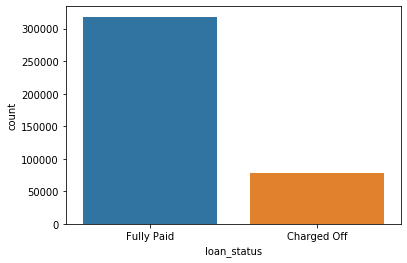

In [6]:
print(df['loan_status'].value_counts())
sns.countplot(x='loan_status',data=df)

Now let's look at the loan amount. Based on the distribution plot as well as the summary information below, it looks like these numbers are pretty reasonable and the mean is roughly less than 15000 dollars:

count    396030.000000
mean      14113.888089
std        8357.441341
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       40000.000000
Name: loan_amnt, dtype: float64


(0, 45000)

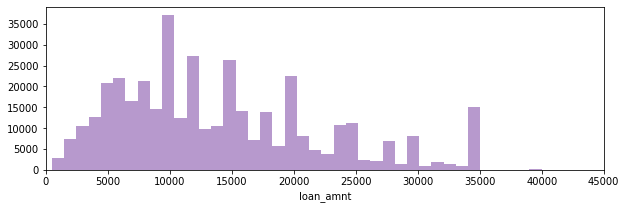

In [7]:
print(df['loan_amnt'].describe())

plt.figure(figsize=(10,3)) # controlling the size of the picture
sns.distplot(df['loan_amnt'],kde=False,bins=40, color='indigo')
plt.xlim(0,45000)

Now let's look at variable correlation, and let's visualize it using a heatmap. From below, the 'loan_amnt' variable is highly correlated wiht the 'installment' variable. The 'installment' variable here refers to the monthly payment owed by the borrower if the loan originates. The 'loan_amnt' variable here is the listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

In [8]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


(10, 0)

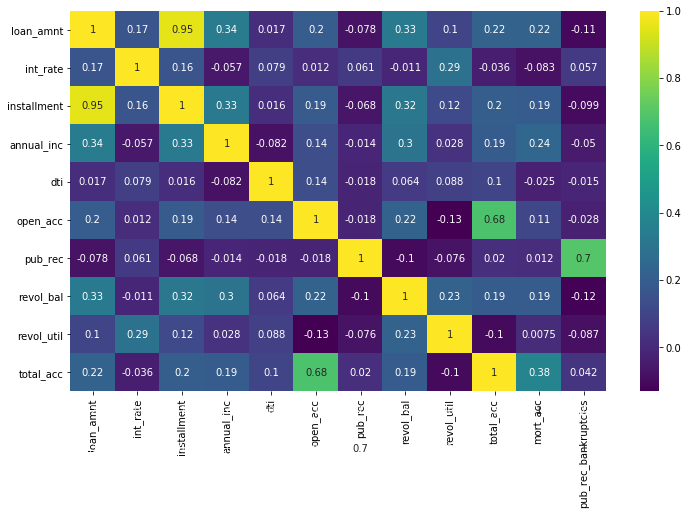

In [9]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis') # annotation displays the correlation coefficients
plt.ylim(10, 0)

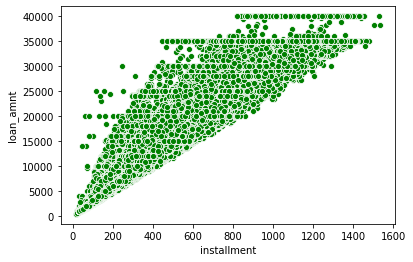

In [10]:
sns.scatterplot(x='installment',y='loan_amnt',data=df, color='green')

Now let's examine the relationship between 'loan_amnt' and the target variable using a boxplot. We will also calculate some summary statistics by 'loan_status':

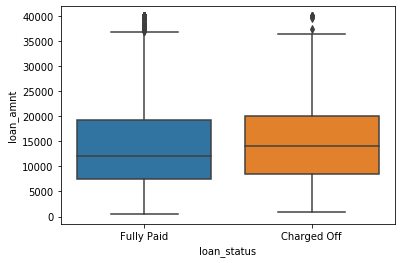

In [11]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [12]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


Now let's look at other variables. First, let's look at grades and subgrades. Loan grading is a classification system that involves assigning a quality score to a loan based on a borrower's credit history, quality of the collateral, and the likelihood of repayment of the principal and interest. A score can also be applied to a portfolio of loans. We can do some analysis on both grades and subgrades. Let's see what type of values we have in our dataset:

In [13]:
gradelist=sorted(df['grade'].unique())
print(gradelist)

['A', 'B', 'C', 'D', 'E', 'F', 'G']


In [14]:
subgradelist=sorted(df['sub_grade'].unique())
print(subgradelist)

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


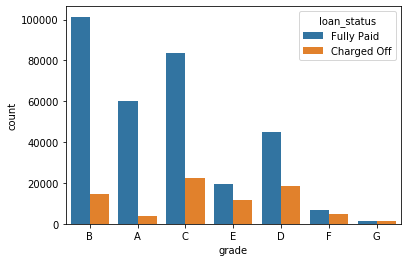

In [15]:
sns.countplot(x='grade',data=df,hue='loan_status')

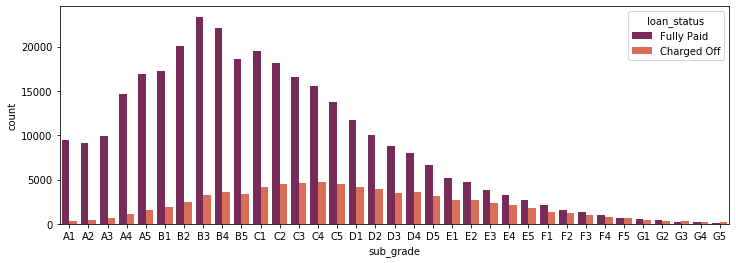

In [16]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='rocket' ,hue='loan_status')

These stories presented above makes sense because it looks like F and G subgrades don't get paid back that often.

Now let's create a new column called 'load_repaid' which will contain a 1 if the loan status was 'Fully Paid' and a 0 if it was 'Charged Off':

In [17]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

Now let's create a bar plot showing the correlation of the numeric features to the new loan_repaid column:

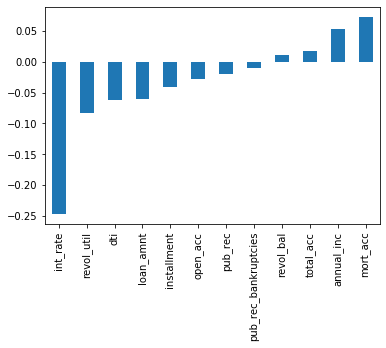

In [18]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

Now let's examine missing data. This is a always a big topic during the neural network modeling process. To start with, let's create a 'Series' object that displays the total count of missing values per column, using the command 'df.isnull().sum()', and then convert this to be in terms of percentage of the total. As we will see, the variables 'emp_title'and 'emp_length'have the most missing value, the question next would be whether we should drop them:

In [19]:
100* df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

['1 year', '10+ years', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '< 1 year']


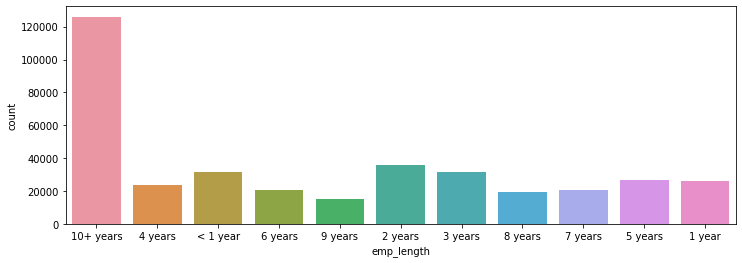

In [20]:
print(sorted(df['emp_length'].dropna().unique()))
plt.figure(figsize=(12,4))

sns.countplot(x='emp_length',data=df)

Realistically, keeping the variable regarding the employment titles will indicates a lot of dummies, so we will drop those. But we will keep the variable measuring employment length for the time being. Now the next question would be to understand what is the relationship between the target variable as well as employment length:

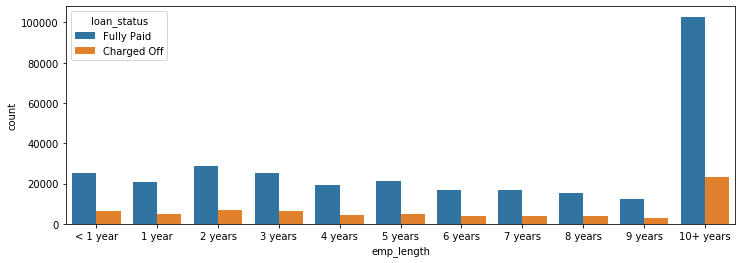

In [21]:
df = df.drop('emp_title',axis=1)
plt.figure(figsize=(12,4))
emp_length_order = ['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years']
sns.countplot(x='emp_length',data=df,order= emp_length_order, hue='loan_status')

This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan. So let's look at whether the percentage, or the ratio between the two target values per category:

In [22]:
emp_co = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']
emp_fp = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']
ratio = emp_co/emp_fp
ratio

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

Charge off rates are extremely similar across all employment lengths. So we can drop the employment length variable as well.

There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or even bin the columns into categories and then set NaN as its own category. There is no 100% correct approach. Let's review the other columns to see which most highly correlates to the variable 'mort_acc' (the number of mortgage accounts):

In [23]:
df = df.drop(['title', 'emp_length'],axis=1)

print("Correlation with the mort_acc column")
df.corr()['mort_acc'].sort_values()

Correlation with the mort_acc column


int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

It looks like the 'total_acc' feature (the total number of credit lines currently in the borrower's credit file) correlates with the variable 'mort_acc' the most, and this seems to make sense. Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value:

In [24]:
print("Mean of mort_acc column per total_acc")
df.groupby('total_acc').mean()['mort_acc']

Mean of mort_acc column per total_acc


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [25]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

def fill_mort_acc(total_acc,mort_acc):
    '''
    This function ccepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    Here, total_acc_avg should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc
    
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

The variable 'revol_util' and the 'pub_rec_bankruptcies' have missing data points, but they account for less than 0.5% of the total data. For simplicity, we can go ahead and remove the rows that are missing those values in those columns with dropna().

In [26]:
df = df.dropna()

We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns. First, let's see which columns are string in nature:

In [27]:
cat_vars=df.select_dtypes(['object']).columns
print(cat_vars)
print(type(cat_vars))

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')
<class 'pandas.core.indexes.base.Index'>


Now let's go through each variable to clean it up. First, let's go to the 'term' variable. As we see, there are only 2 types of terms (3 years and 5 years). So let's convert the 'term' feature into either a 36 or 60 integer numeric data type:

In [28]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [29]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

Next, let's convert the 'sub_grade'  into dummy variables. And then we can concatenate these new columns to the original data. Meanwhile, we already know grade is part of sub_grade, so just drop the 'grade' feature:

In [30]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True) # avoiding the dummy variable trap by setting drop_first=True
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)
df = df.drop('grade',axis=1)

In the same way, let's now convert these columns: 'verification_status', 'application_type','initial_list_status','purpose' into dummy variables and concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns. We can do them altogether:

In [31]:
print(df['verification_status'].value_counts(), "\n")
print(df['initial_list_status'].value_counts(), "\n")
print(df['application_type'].value_counts(), "\n")
print(df['purpose'].value_counts(), "\n")

Verified           139451
Source Verified    131301
Not Verified       124467
Name: verification_status, dtype: int64 

f    237346
w    157873
Name: initial_list_status, dtype: int64 

INDIVIDUAL    394508
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64 

debt_consolidation    234169
credit_card            82923
home_improvement       23961
other                  21059
major_purchase          8756
small_business          5656
car                     4670
medical                 4175
moving                  2842
vacation                2442
house                   2197
wedding                 1794
renewable_energy         329
educational              246
Name: purpose, dtype: int64 



In [32]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)
# print(dummies.columns)

Now let's review the variable 'home_ownership'. As we see, we need to combine the 'OTHER', 'NONE' and 'ANY' category into one single category:

In [33]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [34]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

Now let's continue with feature engineering. We examine the 'address' variable and see whether we can get some information out of it. Notice that the address always ends with zipcodes. So let's pull out the last 5 characters and then create dummies as before. 

In [35]:
print(df['address'].head())

df['zip_code'] = df['address'].apply(lambda address:address[-5:])
print(type(df['zip_code'][0]))

0       0174 Michelle Gateway\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3              823 Reid Ford\nDelacruzside, MA 00813
4               679 Luna Roads\nGreggshire, VA 11650
Name: address, dtype: object
<class 'str'>


In [36]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

The variable 'issue_d' standss for the month which the loan was funded. It doesn't contain too much information. So we will drop it. The variable 'earliest_cr_line' refers to the month the borrower's earliest reported credit line was opened. This appears to be a historical time stamp feature. Let's extract the year from this feature using the apply() function, then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'. Then as usual, we will drop the original 'earliest_cr_line' feature. Lastly, we will drop the 'load_status' column we created earlier, since its a duplicate of the 'loan_repaid' column. We'll use the loan_repaid column since its already in 0s and 1s.

In [37]:
df = df.drop('issue_d',axis=1)

df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [38]:
df = df.drop('loan_status',axis=1)
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

Let's now do the train-test split as well as normalizing the data:

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Now let's build the model.

In [40]:
model = Sequential()

# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [41]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Train on 316175 samples, validate on 79044 samples
Epoch 1/25
316175/316175 [==============================] - 8s 24us/sample - loss: 0.3016 - val_loss: 0.2651
Epoch 2/25
316175/316175 [==============================] - 4s 12us/sample - loss: 0.2659 - val_loss: 0.2647
Epoch 3/25
316175/316175 [==============================] - 4s 12us/sample - loss: 0.2632 - val_loss: 0.2627
Epoch 4/25
316175/316175 [==============================] - 4s 12us/sample - loss: 0.2618 - val_loss: 0.2619
Epoch 5/25
316175/316175 [==============================] - 4s 12us/sample - loss: 0.2608 - val_loss: 0.2623
Epoch 6/25
316175/316175 [==============================] - 4s 12us/sample - loss: 0.2605 - val_loss: 0.2615
Epoch 7/25
316175/316175 [==============================] - 4s 12us/sample - loss: 0.2601 - val_loss: 0.2618
Epoch 8/25
316175/316175 [==============================] - 4s 12us/sample - loss: 0.2595 - val_loss: 0.2615
Epoch 9/25
316175/316175 [==============================] - 4s 12us/sample - 

Now let's evaluate the model performance:

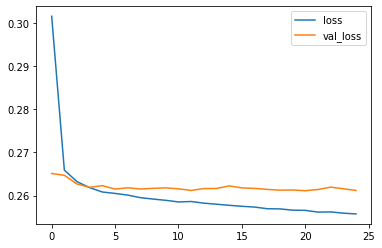

In [42]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

Now let's create predictions from the X_test set and display a classification report and confusion matrix for the X_test set:

In [43]:
predictions = model.predict_classes(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.46      0.62     15658
           1       0.88      0.99      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.92      0.73      0.78     79044
weighted avg       0.89      0.89      0.87     79044



In [44]:
print(confusion_matrix(y_test,predictions))

[[ 7180  8478]
 [  387 62999]]


### II. Predicting Housing Prices

Next we will study a regression problem using ANN. We have a dataset on housing price and we want to use different attributes to predict housing prices. Here are the column nanes:

* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [45]:
df = pd.read_csv('kc_house_data.csv')
print(df.info())
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


Now let's do some EDA. First, let's look at the distribution of the target variable price:

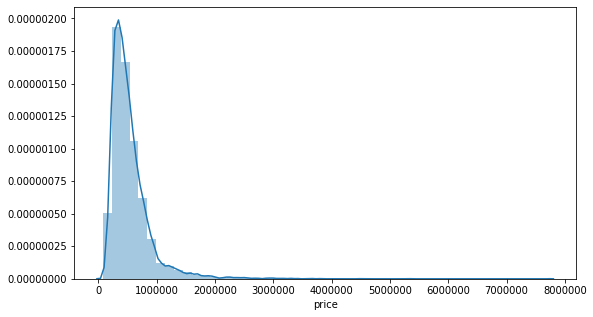

In [46]:
plt.figure(figsize=(9,5))
sns.distplot(df['price'])

Let's look at missing values:

In [47]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Next let's look at dynatmics between housing price with some of these covariates. First, let's look at what correlates with the housing price the most:

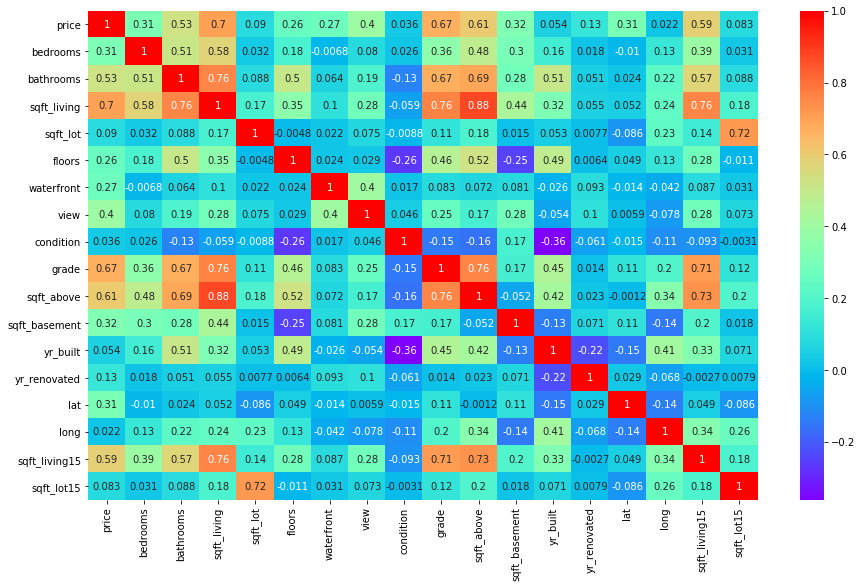

In [48]:
plt.figure(figsize=(15,9))
sns.heatmap(df.drop(['id','zipcode'], axis=1).corr(),annot=True,cmap='rainbow') # removing the id and zipcode fields to simplify the picture

It seems that housng price is mostly associated the square footage of the inteior living space, and the latter is also highly correlated with the the square footage of the interior housing space that is above ground level. Let's look at the scatterplot:

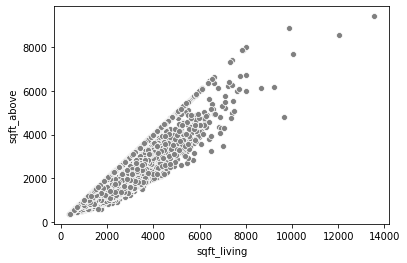

In [49]:
sns.scatterplot(x='sqft_living',y='sqft_above',data=df, color='grey')

Now let's look at integer-valued columns and categorical columns:

In [50]:
cat_vars=df.select_dtypes(['object', 'int64']).columns
print(cat_vars)

Index(['id', 'date', 'bedrooms', 'sqft_living', 'sqft_lot', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


Now let's examine the data more carefully. Based on the countplot() results, we see that there are mostly 2-4 bedrooms in the dataset, majority of the places do not face a waterfront. The 'view' variable is an index from 0 to 4 of how good the view of the property was. From the EDA below, we see good views are rare. 

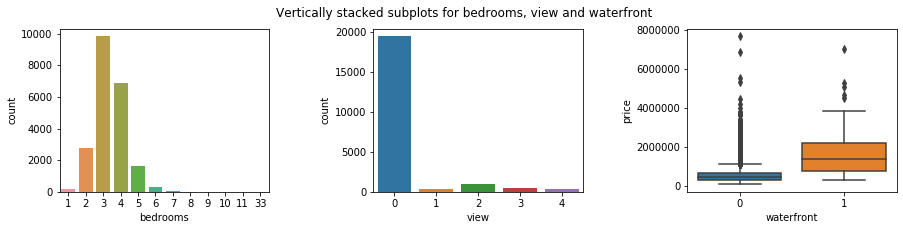

In [51]:
fig, axs = plt.subplots(ncols=3, figsize=(15,3))
fig.suptitle('Vertically stacked subplots for bedrooms, view and waterfront')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.2) # adjusting in-between space

sns.countplot(x='bedrooms',data=df, ax=axs[0])
sns.countplot(x='view',data=df, ax=axs[1])
sns.boxplot(x='waterfront',y='price',data=df, ax=axs[2])

Let's look at the effect on price:

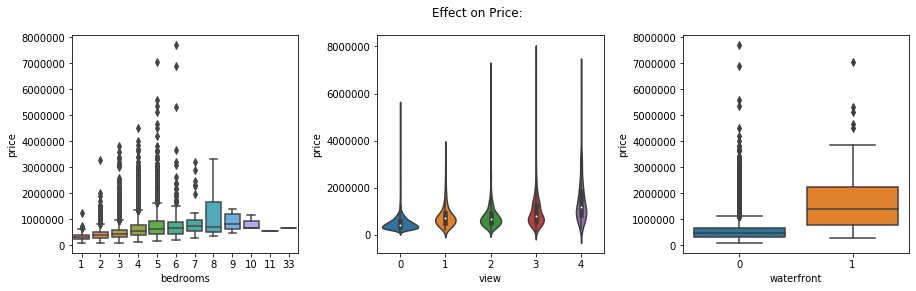

In [52]:
fig, axs = plt.subplots(ncols=3, figsize=(15,4))
fig.suptitle('Effect on Price:')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.35, hspace=None) # adjusting in-between space

sns.boxplot(x='bedrooms',y='price',data=df, ax=axs[0])
sns.violinplot(x='view',y='price',data=df, ax=axs[1])
sns.boxplot(x='waterfront',y='price',data=df, ax=axs[2])

The variable 'grade' is an index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design. The variable 'condition' ranges from 1-5 describing quality. Below is some analysis on these variables:

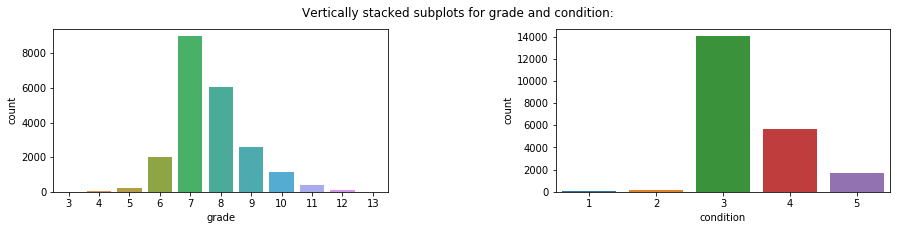

In [53]:
fig, axs = plt.subplots(ncols=2, figsize=(15,3))
fig.suptitle('Vertically stacked subplots for grade and condition:')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.2) # adjusting in-between space

sns.countplot(x='grade',data=df, ax=axs[0])
sns.countplot(x='condition',data=df, ax=axs[1])

In [54]:
bygrade=df.groupby(['grade'], as_index=False)['price'].median()
bygrade.rename({'price': 'median price'}, axis=1, inplace=True)
bycondition=df.groupby(['condition'], as_index=False)['price'].median()
bycondition.rename({'price': 'median price'}, axis=1, inplace=True)
print(bygrade, '\n')
print(bycondition, '\n')

    grade  median price
0       3      262000.0
1       4      200000.0
2       5      228700.0
3       6      275276.5
4       7      375000.0
5       8      510000.0
6       9      720000.0
7      10      914327.0
8      11     1280000.0
9      12     1820000.0
10     13     2980000.0 

   condition  median price
0          1      270000.0
1          2      279000.0
2          3      450250.0
3          4      440000.0
4          5      526000.0 



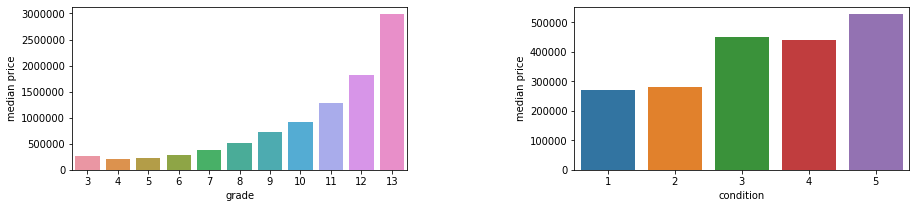

In [55]:
fig, axs = plt.subplots(ncols=2, figsize=(15,3))

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.2) # adjusting in-between space

sns.barplot(x='grade', y='median price', data=bygrade, ax=axs[0])
sns.barplot(x='condition', y='median price', data=bycondition, ax=axs[1])

Next, let's examine those geographical variables. First, let's look at longitude and latitude:

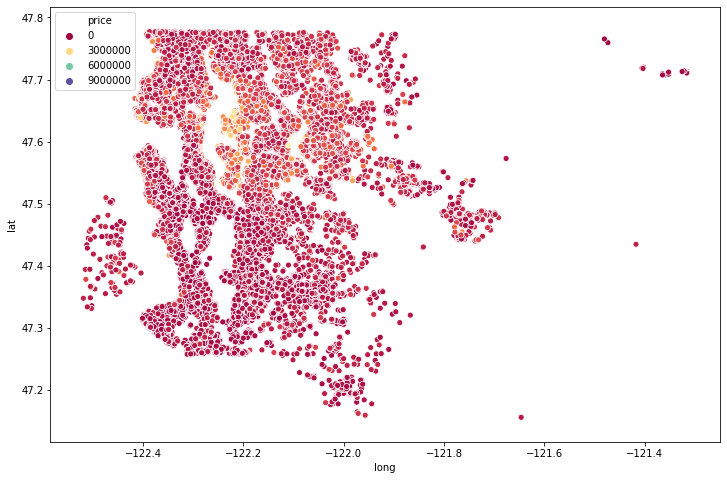

In [56]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price', palette='Spectral')

Next let's work with those time variables for feature engineering. We also drop the variable 'id' as it doesn't contain too much information. We will also look at visuals and we will confirm that when the houses were sold has an impact on prices.

In [57]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)

df.drop(['date'], axis=1, inplace=True)

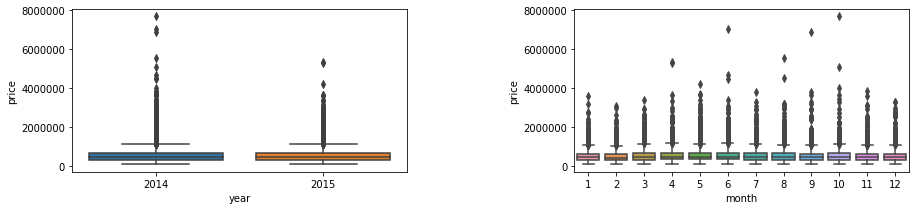

In [58]:
fig, axs = plt.subplots(ncols=2, figsize=(15,3))

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.2) # adjusting in-between space

sns.boxplot(x='year',y='price',data=df, ax=axs[0])
sns.boxplot(x='month',y='price',data=df, ax=axs[1])

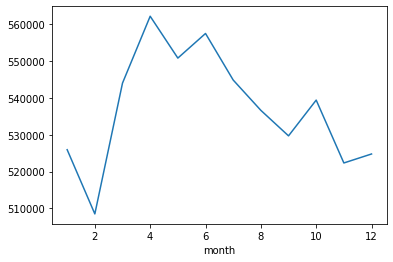

In [59]:
df.groupby('month').mean()['price'].plot()

Next let's think about the variable 'zipcode'. There are 70 distinct zipcodes. Creating dummies is one way to go about it but ideally if we can segment the zipcodes into just a few categories based on prices, that would be ideal. This is the idea of dimensionality reduction. However, this is a very hard topoic. For simplicity, let's drop the all the zipcode. 

In [60]:
df.drop(['zipcode'], axis=1, inplace=True)

Now let's do the test-train split and standardize the data:

In [61]:
X = df.drop('price',axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [62]:
scaler = MinMaxScaler()

X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(15117, 20)
(6480, 20)


Let's now train the model:

In [63]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [64]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 1s 72us/sample - loss: 430232749012.8507 - val_loss: 418874831586.2914
Epoch 2/400
15117/15117 [==============================] - 0s 20us/sample - loss: 428840202992.4371 - val_loss: 414234208412.7605
Epoch 3/400
15117/15117 [==============================] - 0s 19us/sample - loss: 411582030182.2002 - val_loss: 376090691963.2593
Epoch 4/400
15117/15117 [==============================] - 0s 20us/sample - loss: 333188693562.9662 - val_loss: 252362960056.5728
Epoch 5/400
15117/15117 [==============================] - 0s 20us/sample - loss: 184715355222.9083 - val_loss: 117670552684.7210
Epoch 6/400
15117/15117 [==============================] - 0s 19us/sample - loss: 107084848013.4545 - val_loss: 97824324448.7111
Epoch 7/400
15117/15117 [==============================] - 0s 20us/sample - loss: 100476159760.3419 - val_loss: 96209384233.0864
Epoch 8/400
15117/15117 [==================

15117/15117 [==============================] - 0s 18us/sample - loss: 38726695087.5777 - val_loss: 37555901043.0420
Epoch 65/400
15117/15117 [==============================] - 0s 18us/sample - loss: 38507952958.6071 - val_loss: 37352548599.7827
Epoch 66/400
15117/15117 [==============================] - 0s 17us/sample - loss: 38340997378.6249 - val_loss: 37170267254.8346
Epoch 67/400
15117/15117 [==============================] - 0s 18us/sample - loss: 38135527084.4279 - val_loss: 36982550629.1358
Epoch 68/400
15117/15117 [==============================] - 0s 16us/sample - loss: 37945320528.6763 - val_loss: 36812923051.9309
Epoch 69/400
15117/15117 [==============================] - 0s 15us/sample - loss: 37801029865.4262 - val_loss: 36669514081.9753
Epoch 70/400
15117/15117 [==============================] - 0s 15us/sample - loss: 37596928402.6365 - val_loss: 36425162028.8790
Epoch 71/400
15117/15117 [==============================] - 0s 15us/sample - loss: 37414993382.6997 - val_loss

15117/15117 [==============================] - 0s 15us/sample - loss: 33334337148.7062 - val_loss: 32093342317.9852
Epoch 128/400
15117/15117 [==============================] - 0s 15us/sample - loss: 33286920262.0414 - val_loss: 32019052367.0123
Epoch 129/400
15117/15117 [==============================] - 0s 15us/sample - loss: 33269124693.5196 - val_loss: 32027628339.2000
Epoch 130/400
15117/15117 [==============================] - 0s 15us/sample - loss: 33270804871.3242 - val_loss: 31937222079.5259
Epoch 131/400
15117/15117 [==============================] - 0s 15us/sample - loss: 33219953527.2364 - val_loss: 31905092504.3358
Epoch 132/400
15117/15117 [==============================] - 0s 15us/sample - loss: 33171563242.0697 - val_loss: 31844241200.6716
Epoch 133/400
15117/15117 [==============================] - 0s 15us/sample - loss: 33174043150.2928 - val_loss: 31804770683.2593
Epoch 134/400
15117/15117 [==============================] - 0s 15us/sample - loss: 33083795348.1606 - v

15117/15117 [==============================] - 0s 19us/sample - loss: 31782059929.3087 - val_loss: 30201276562.6469
Epoch 190/400
15117/15117 [==============================] - 0s 18us/sample - loss: 31761893622.4320 - val_loss: 30128401481.3235
Epoch 191/400
15117/15117 [==============================] - 0s 16us/sample - loss: 31782992610.2121 - val_loss: 30096417137.1457
Epoch 192/400
15117/15117 [==============================] - 0s 15us/sample - loss: 31719262399.0220 - val_loss: 30229435804.1284
Epoch 193/400
15117/15117 [==============================] - 0s 15us/sample - loss: 31752232418.5000 - val_loss: 30152374352.9086
Epoch 194/400
15117/15117 [==============================] - 0s 15us/sample - loss: 31716942429.3773 - val_loss: 30071936341.3333
Epoch 195/400
15117/15117 [==============================] - 0s 15us/sample - loss: 31688988348.2109 - val_loss: 30095075287.5457
Epoch 196/400
15117/15117 [==============================] - 0s 15us/sample - loss: 31670289983.9788 - v

15117/15117 [==============================] - 0s 16us/sample - loss: 30921795387.5589 - val_loss: 29013205654.4395
Epoch 253/400
15117/15117 [==============================] - 0s 15us/sample - loss: 30879437306.1406 - val_loss: 28972685908.7012
Epoch 254/400
15117/15117 [==============================] - 0s 15us/sample - loss: 30879601358.2293 - val_loss: 29084220929.2642
Epoch 255/400
15117/15117 [==============================] - 0s 15us/sample - loss: 30855741070.7585 - val_loss: 29206378981.4519
Epoch 256/400
15117/15117 [==============================] - 0s 15us/sample - loss: 30875113790.9797 - val_loss: 28986243451.2593
Epoch 257/400
15117/15117 [==============================] - 0s 15us/sample - loss: 30839442986.4380 - val_loss: 29008848198.1630
Epoch 258/400
15117/15117 [==============================] - 0s 15us/sample - loss: 30811293723.2308 - val_loss: 28955601952.8691
Epoch 259/400
15117/15117 [==============================] - 0s 15us/sample - loss: 30793975012.6168 - v

15117/15117 [==============================] - 0s 18us/sample - loss: 30270306164.0527 - val_loss: 28190575375.8025
Epoch 316/400
15117/15117 [==============================] - 0s 17us/sample - loss: 30255586444.5570 - val_loss: 28175806575.2494
Epoch 317/400
15117/15117 [==============================] - 0s 18us/sample - loss: 30254786061.3783 - val_loss: 28165885405.8667
Epoch 318/400
15117/15117 [==============================] - 0s 20us/sample - loss: 30209327578.4391 - val_loss: 28238136373.0963
Epoch 319/400
15117/15117 [==============================] - 0s 17us/sample - loss: 30264542710.2118 - val_loss: 28176760983.7037
Epoch 320/400
15117/15117 [==============================] - 0s 17us/sample - loss: 30239494432.9716 - val_loss: 28248237953.5802
Epoch 321/400
15117/15117 [==============================] - 0s 22us/sample - loss: 30190063774.7786 - val_loss: 28252584760.2568
Epoch 322/400
15117/15117 [==============================] - 0s 18us/sample - loss: 30230072033.2299 - v

15117/15117 [==============================] - 0s 19us/sample - loss: 29643910048.6922 - val_loss: 27531788323.3975
Epoch 379/400
15117/15117 [==============================] - 0s 21us/sample - loss: 29688603545.3765 - val_loss: 27526913486.6963
Epoch 380/400
15117/15117 [==============================] - 0s 18us/sample - loss: 29652772805.7451 - val_loss: 27490510488.9679
Epoch 381/400
15117/15117 [==============================] - 0s 18us/sample - loss: 29637046956.1569 - val_loss: 27470814837.5704
Epoch 382/400
15117/15117 [==============================] - 0s 18us/sample - loss: 29593338422.9019 - val_loss: 27410420521.0864
Epoch 383/400
15117/15117 [==============================] - 0s 18us/sample - loss: 29613277065.0515 - val_loss: 27422168405.3333
Epoch 384/400
15117/15117 [==============================] - 0s 18us/sample - loss: 29610108159.1702 - val_loss: 27422494800.9086
Epoch 385/400
15117/15117 [==============================] - 0s 18us/sample - loss: 29577536423.1951 - v

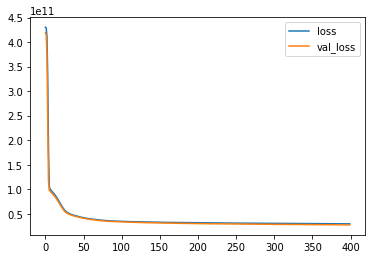

In [65]:
losses = pd.DataFrame(model.history.history)
losses.plot()

Now let's evaluate the model on the test dataset. Let's also visually compare the predicted value against the actual value in the test:

In [66]:
predictions = model.predict(X_test)

In [67]:
print('MAE: ', mean_absolute_error(y_test,predictions))
print('Explained Variance Score: ', explained_variance_score(y_test,predictions))
print('Root Mean Squared Error (RMSE): ', np.sqrt(mean_squared_error(y_test,predictions)))

MAE:  101881.1526608314
Explained Variance Score:  0.7948812469077526
Root Mean Squared Error (RMSE):  164930.82342314764


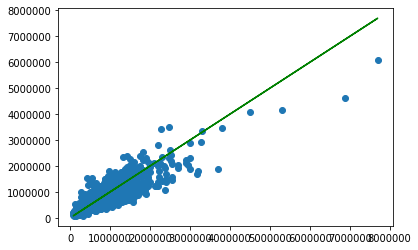

In [68]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'green')

Let's also plot the error for the test data:

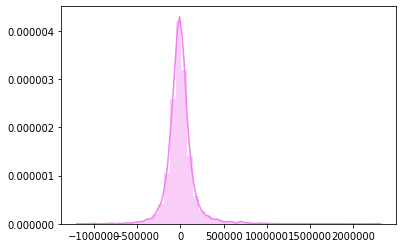

In [69]:
errors = y_test.values.reshape(len(y_test), 1) - predictions
sns.distplot(errors, color='violet')

### References:
   - https://seaborn.pydata.org/tutorial/color_palettes.html
   - https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
   - https://stackoverflow.com/questions/14770735/how-do-i-change-the-figure-size-with-subplots